# Task for Collaborator #3
 _Macabe Daley_

1. Look for correlations between the variables related to the fundamental frequency ('MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)’ and MDVP:Flo(Hz) in the original dataframe) using the scat_plot function. Use the scat_plot function created by your collaborators for this purpose. If the variables are correlated keep only a subset that are representative (one or some of them). Discard the others by removing them from the dataframe. Do the same for the variables related to Jitter ('MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP') and Shimmer ( 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA',). Name this dataframe as cleaned_df and work with it from here on.

2. Function group_and_average(df, gv) This function averages all variables on a given dataframe by aggregating them according to the variable gv. You can use the group_by operation from pandas. The function returns the averaged and aggregated dataframe. Inputs: df: a dataframe gv: the name of the grouping variable Outputs: av_df: averaged df

3. Implement the instructions in the main code to classify the DataFrame data into patients or controls using k-nearest neighbors with k=3. Compare the outcomes across three scenarios: 1) utilizing cleaned and aggregated data, 2) cleaned, aggregated, and z-score normalized data, and lastly, 3 the same, but normalized using the min-max option. Are there differences?

In [3]:
import pandas as pd

In [4]:
# We will start by loading the parkinson dataset. 
dex = pd.read_csv('parkinsons.data',
                 dtype = { # indicate categorical variables
                     'status': 'category'})
dex.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Task 1: Correlations and feature selection

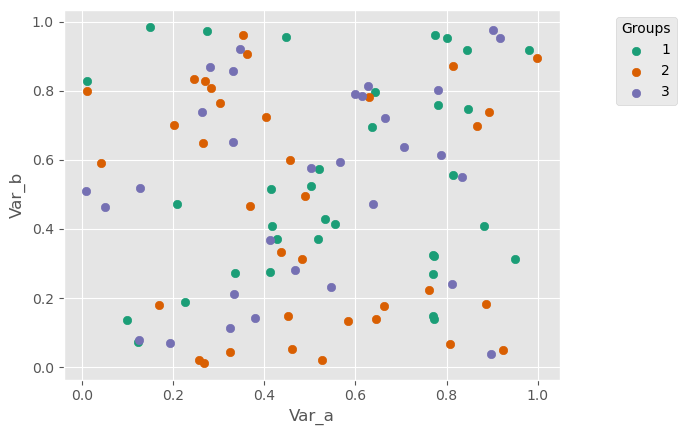

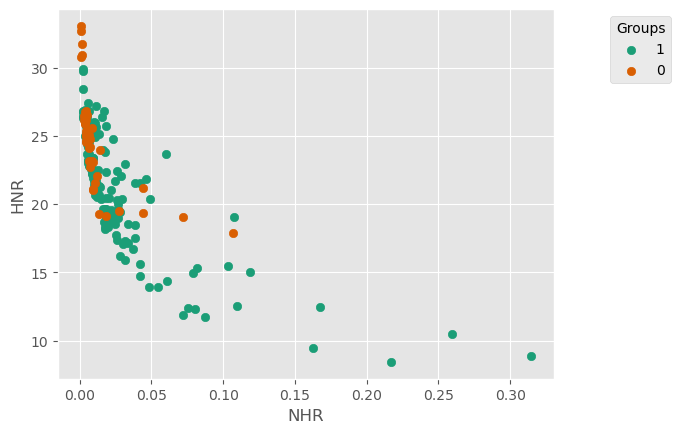

Original DataFrame:
   Var1  Var2 Category
0    10     1        C
1    20     2        B
2    30     3        A
3    40     4        C
4    50     5        A

Z-score Normalized DataFrame:
   Var1  Var2 Category
0    10     1        C
1    20     2        B
2    30     3        A
3    40     4        C
4    50     5        A

Min-max Normalized DataFrame:
   Var1  Var2 Category
0    10     1        C
1    20     2        B
2    30     3        A
3    40     4        C
4    50     5        A
Original DataFrame:
       Var_a     Var_b  Groups_c
0   0.106707  0.331671         2
1   0.637964  0.876125         1
2   0.600811  0.007915         3
3   0.986417  0.547890         2
4   0.526407  0.988353         3
..       ...       ...       ...
95  0.025292  0.004959         1
96  0.192964  0.323575         2
97  0.404001  0.961390         3
98  0.043889  0.638604         2
99  0.251441  0.852107         2

[100 rows x 3 columns]

Z-score Normalized DataFrame:
       Var_a     Var_b  Groups_c


In [5]:
# Load functions from Collaborator 2's notebook
%run Collaborator_2.ipynb

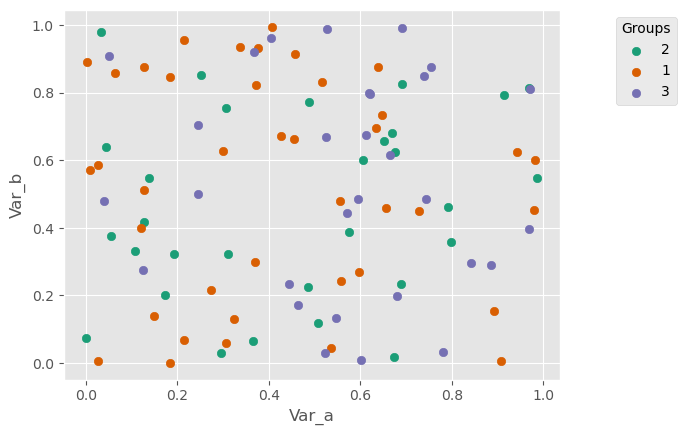

In [6]:
# double check that scat_plt works
scat_plt(df['Var_a'], df['Var_b'], df['Groups_c'])

In [108]:
# if the columns haven't been renamed yet, do this here
# note this is the same function as Collaborator 1 created, in the main merge we could use that one instead
dict_names = {'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'MDVP:Fo(Hz)':'avFF',
              'Shimmer:DDA':'dda'}

def renamevars(df, dict_names):
    df.rename(columns = dict_names, inplace = True)
    renamed_df = df
    return renamed_df

dex = renamevars(dex, dict_names=dict_names)
print(dex.columns)
dex.head()

Index(['name', 'avFF', 'maxFF', 'minFF', 'percJitter', 'absJitter', 'rap',
       'ppq', 'ddp', 'lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda',
       'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')


,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [109]:
# Identify the variables for each group that we want to explore correlation in
vars_ff = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
vars_jitter = ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
vars_shimmer = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']

vars_ff = [dict_names[var] for var in vars_ff]
vars_jitter = [dict_names[var] for var in vars_jitter]
vars_shimmer = [dict_names[var] for var in vars_shimmer]
print(vars_ff, vars_jitter, vars_shimmer)

['avFF', 'maxFF', 'minFF'] ['absJitter', 'rap', 'ppq', 'ddp'] ['lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda']


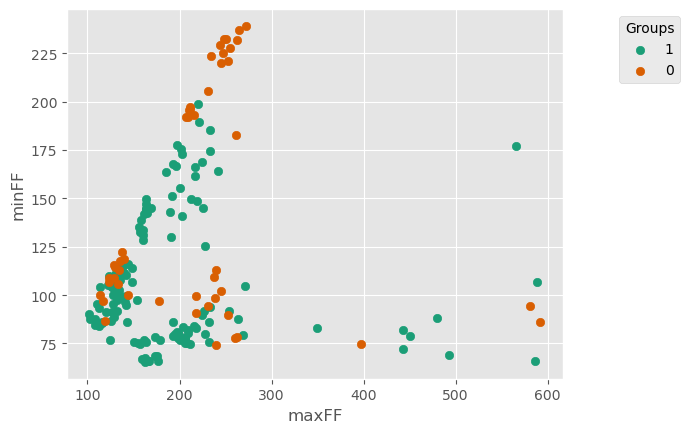

In [110]:
# check that a single scatterplot works
scat_plt(dex['maxFF'], dex['minFF'], dex['status'])

In [111]:
[(x, y) for i, x in enumerate(vars_ff) for y in vars_ff[i+1:] if x != y]


[('avFF', 'maxFF'), ('avFF', 'minFF'), ('maxFF', 'minFF')]

In [133]:
def variable_correlation_plot(variable_list, df, group='status'):
    """
    This method plots the correlations of all unique variable combinations _within_ the variable list provided
    """
    combinations = [(x, y) for i, x in enumerate(variable_list) for y in variable_list[i+1:] if x != y]
    for combination in combinations:
        correlation = np.corrcoef(df[str(combination[0])], df[str(combination[1])])[0, 1]
        print(f'Scatter Plot of {str(combination[0])} vs {str(combination[1])} by {group}\nCorrelation: r={correlation:.2f}')
        scat_plt(df[str(combination[0])], df[str(combination[1])], df[group])
        
    # now let's create an overall correlation matrix to consider all variables at once
    correlation_matrix = df[variable_list].corr()
    sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, )
    plt.title('Clustered correlation heatmap with hierarchical clustering')
    #plt.figure(figsize=(4, 4))
    plt.show()
        



Scatter Plot of avFF vs maxFF by status
Correlation: r=0.40


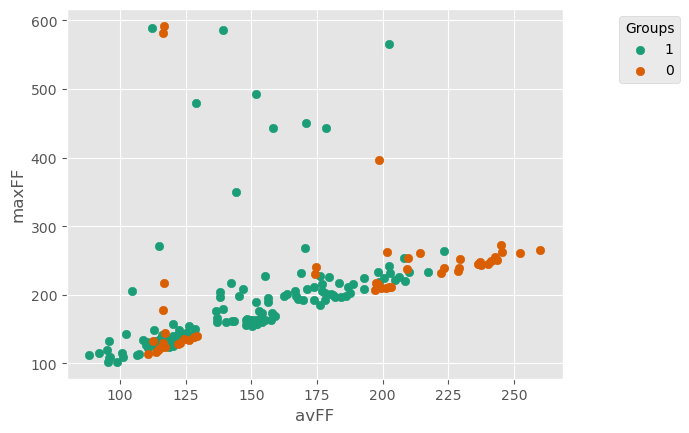

Scatter Plot of avFF vs minFF by status
Correlation: r=0.60


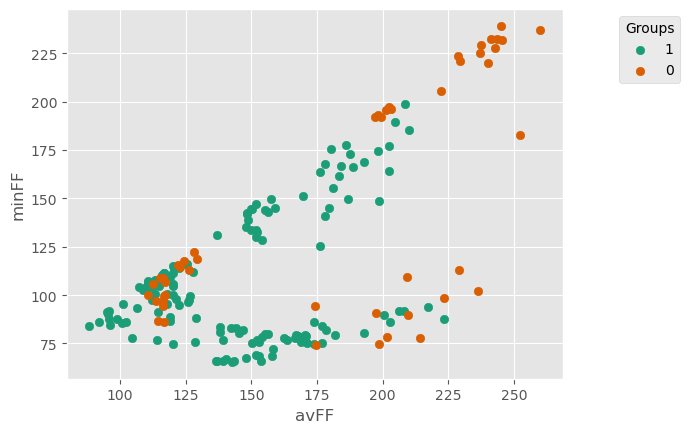

Scatter Plot of maxFF vs minFF by status
Correlation: r=0.08


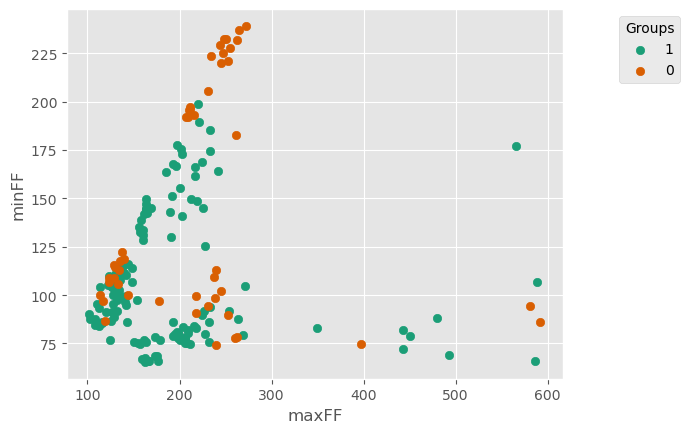

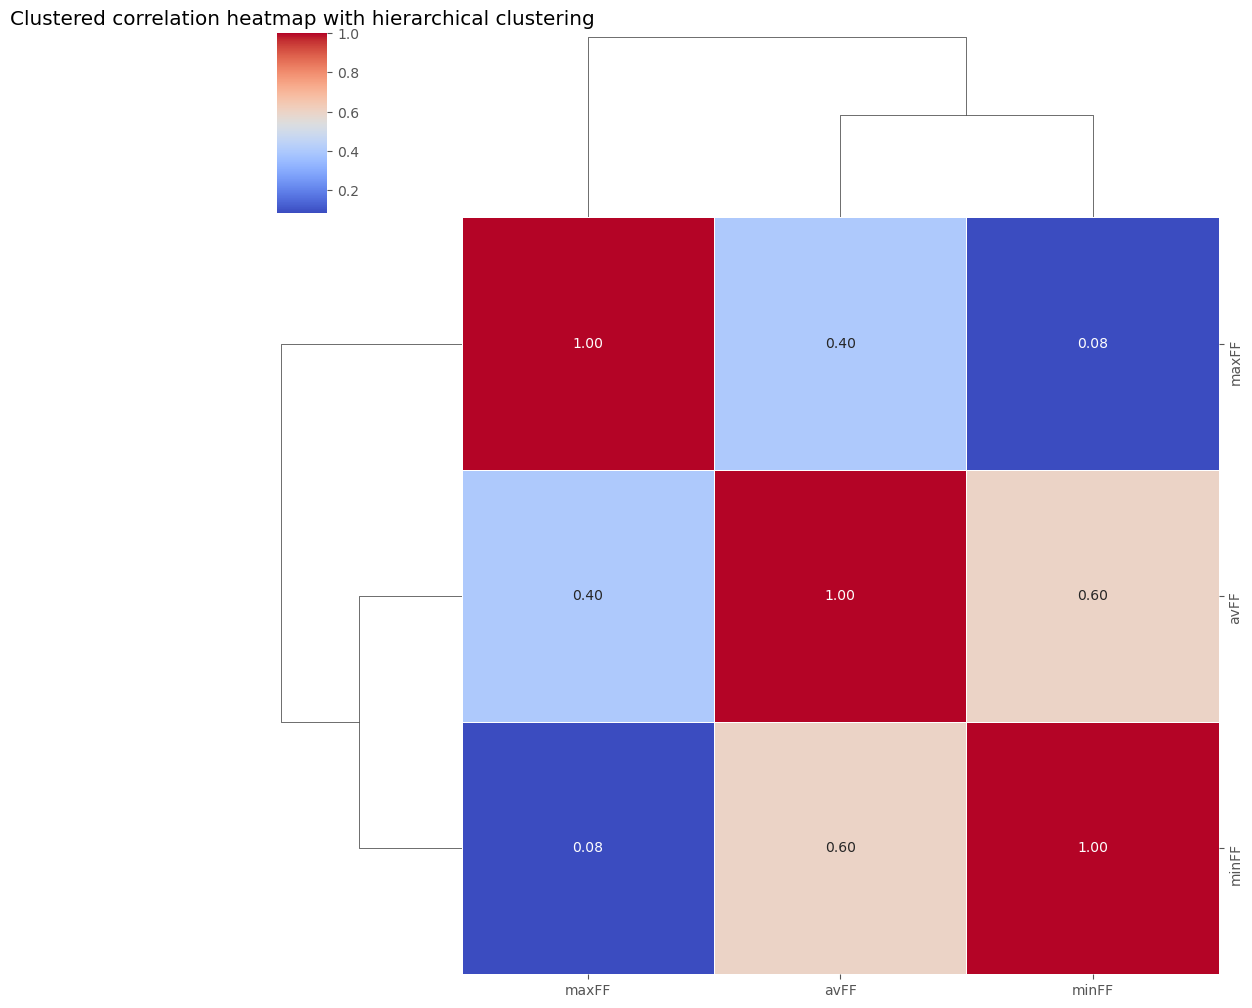

In [134]:
variable_correlation_plot(variable_list=vars_ff, df=dex, group='status')

Scatter Plot of absJitter vs rap by status
Correlation: r=0.92


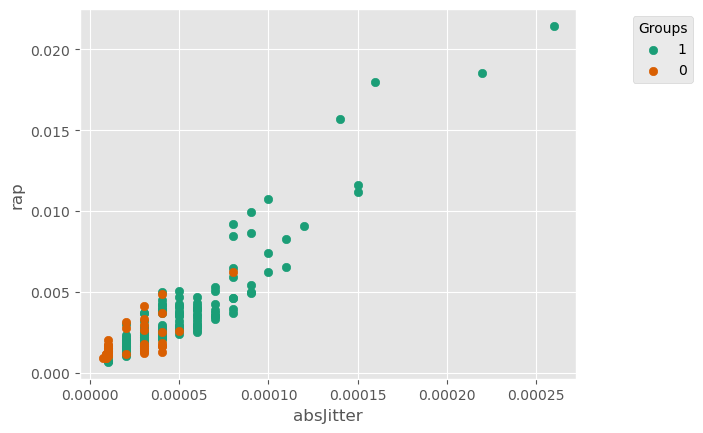

Scatter Plot of absJitter vs ppq by status
Correlation: r=0.90


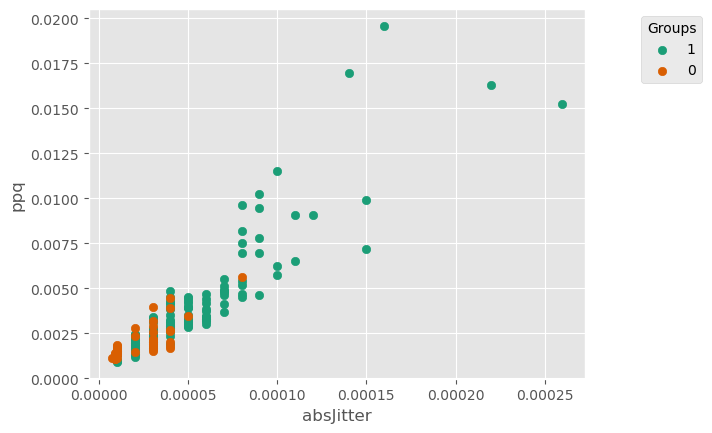

Scatter Plot of absJitter vs ddp by status
Correlation: r=0.92


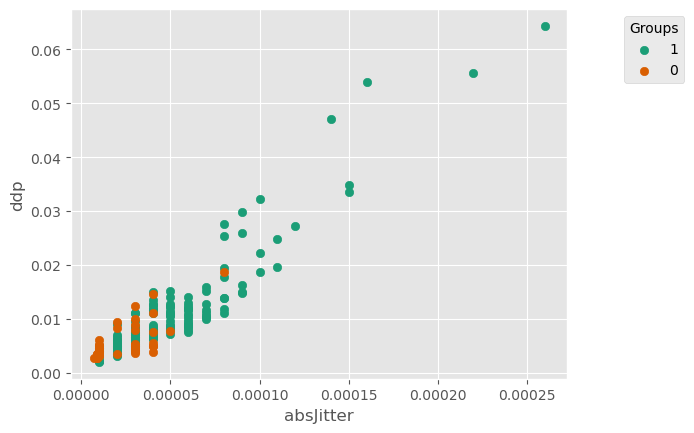

Scatter Plot of rap vs ppq by status
Correlation: r=0.96


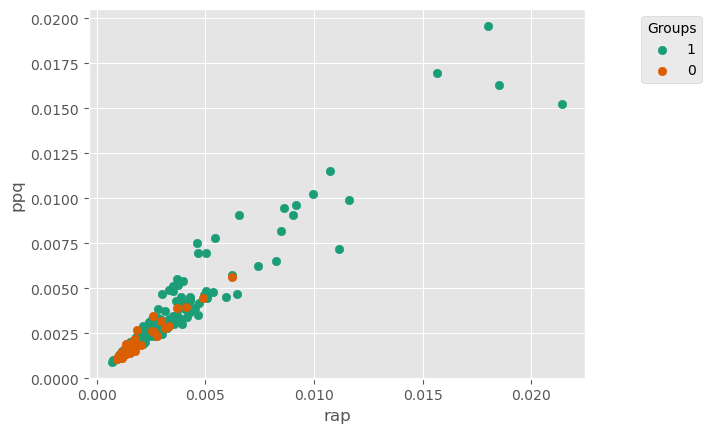

Scatter Plot of rap vs ddp by status
Correlation: r=1.00


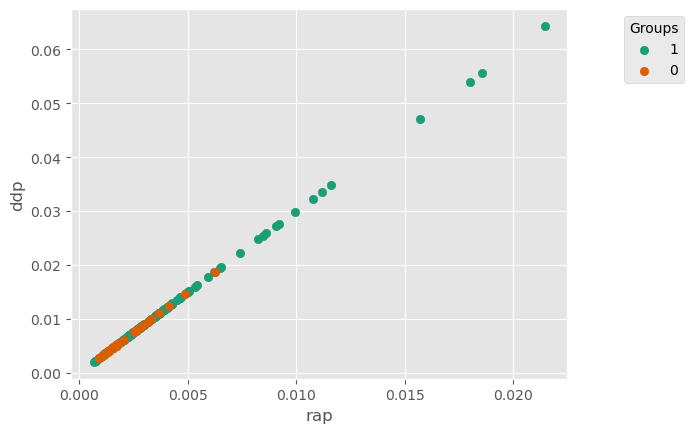

Scatter Plot of ppq vs ddp by status
Correlation: r=0.96


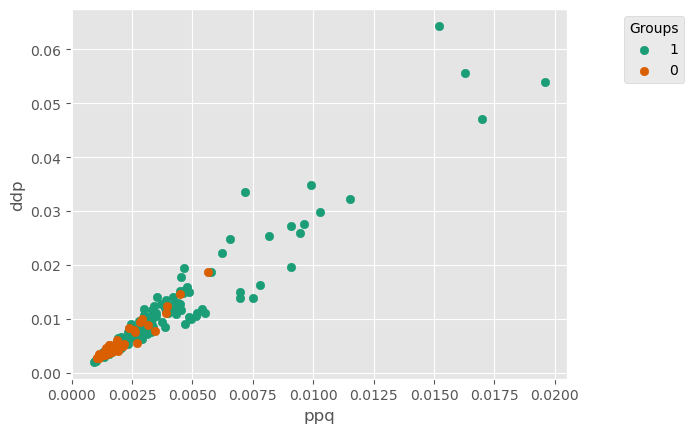

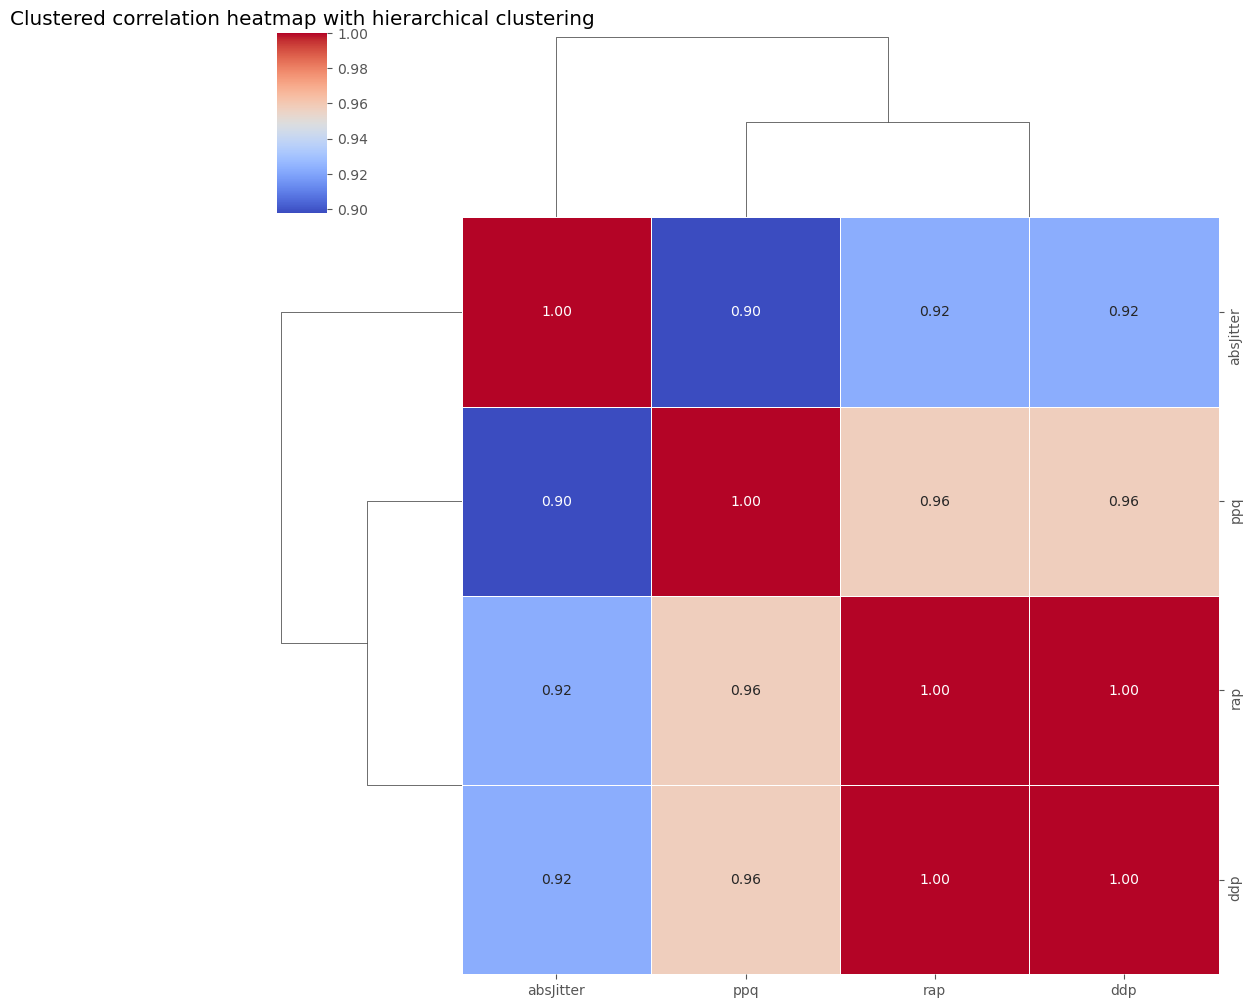

In [135]:
variable_correlation_plot(variable_list=vars_jitter, df=dex, group='status')

Scatter Plot of lShimer vs dbShimer by status
Correlation: r=0.99


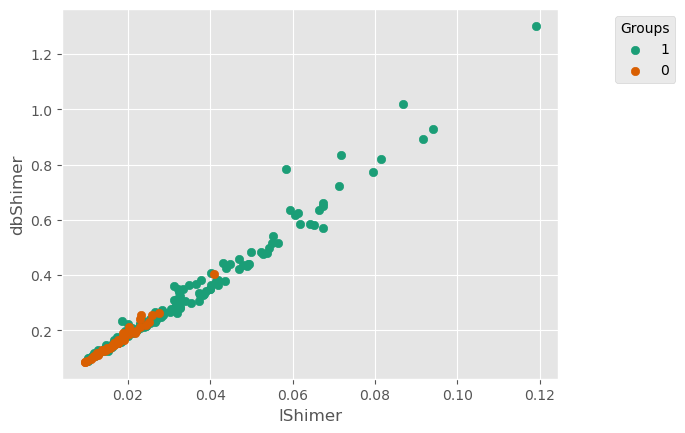

Scatter Plot of lShimer vs apq3 by status
Correlation: r=0.99


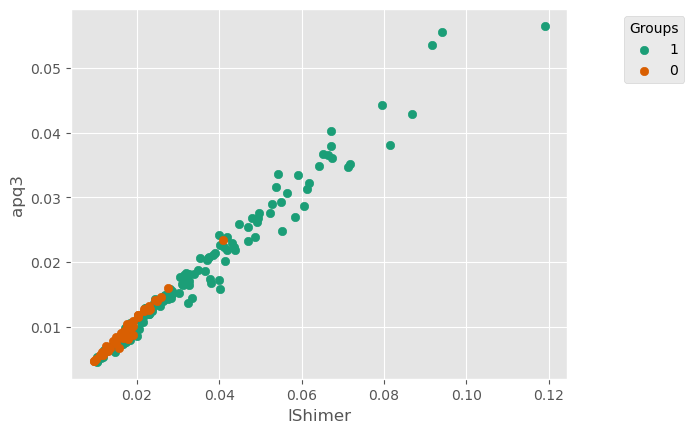

Scatter Plot of lShimer vs apq5 by status
Correlation: r=0.98


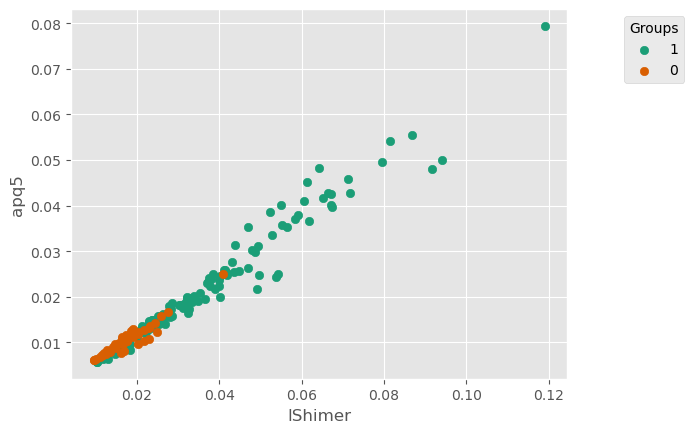

Scatter Plot of lShimer vs apq by status
Correlation: r=0.95


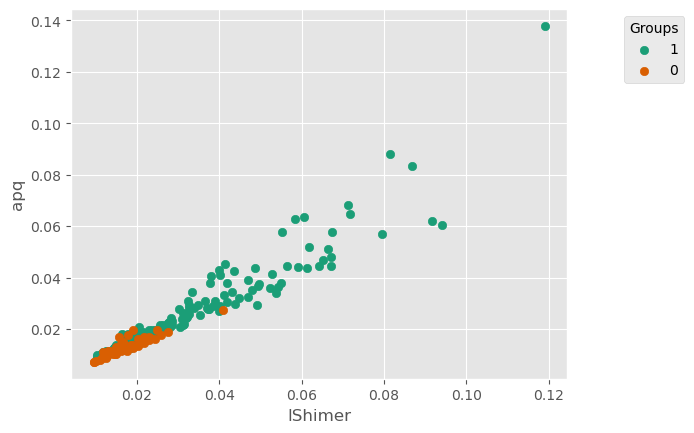

Scatter Plot of lShimer vs dda by status
Correlation: r=0.99


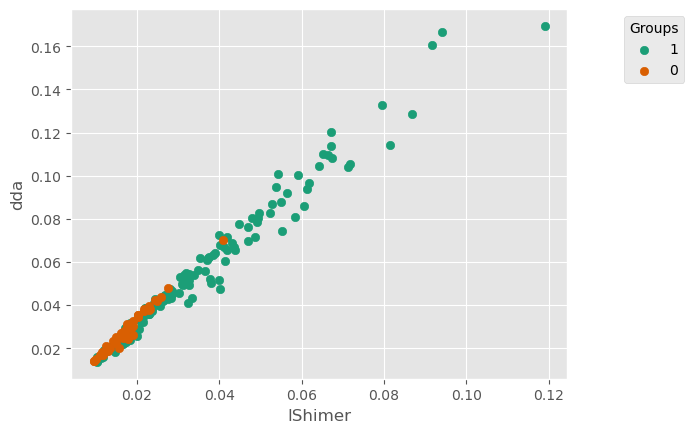

Scatter Plot of dbShimer vs apq3 by status
Correlation: r=0.96


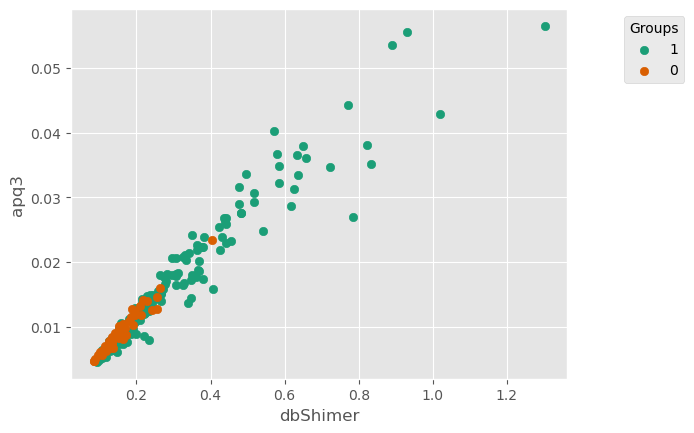

Scatter Plot of dbShimer vs apq5 by status
Correlation: r=0.97


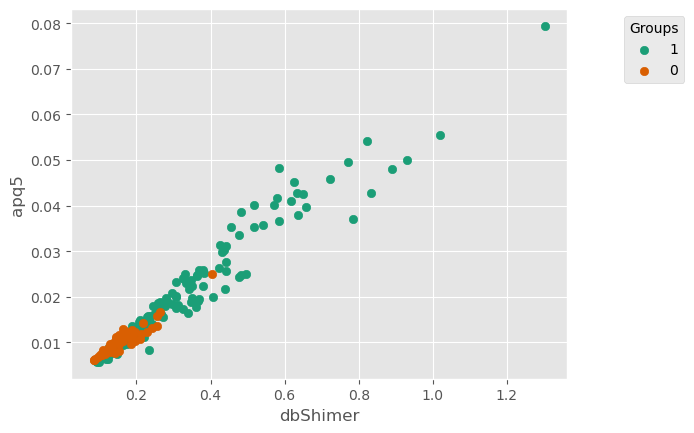

Scatter Plot of dbShimer vs apq by status
Correlation: r=0.96


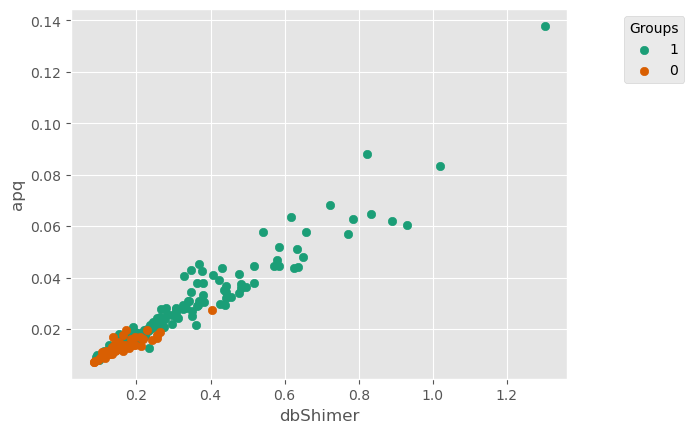

Scatter Plot of dbShimer vs dda by status
Correlation: r=0.96


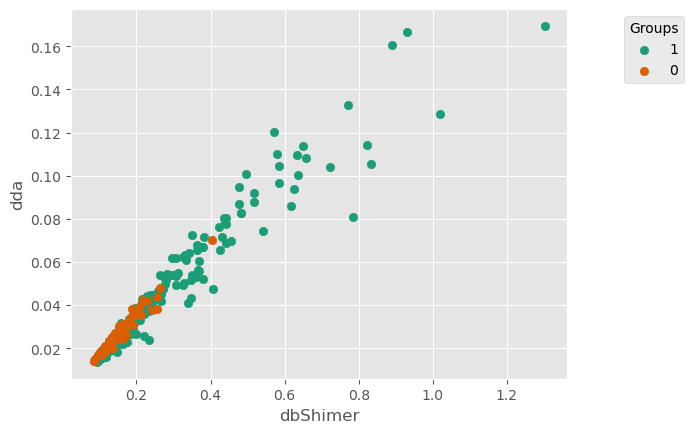

Scatter Plot of apq3 vs apq5 by status
Correlation: r=0.96


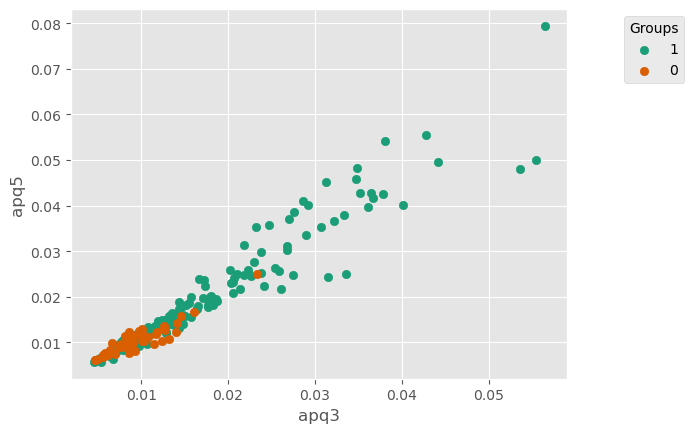

Scatter Plot of apq3 vs apq by status
Correlation: r=0.90


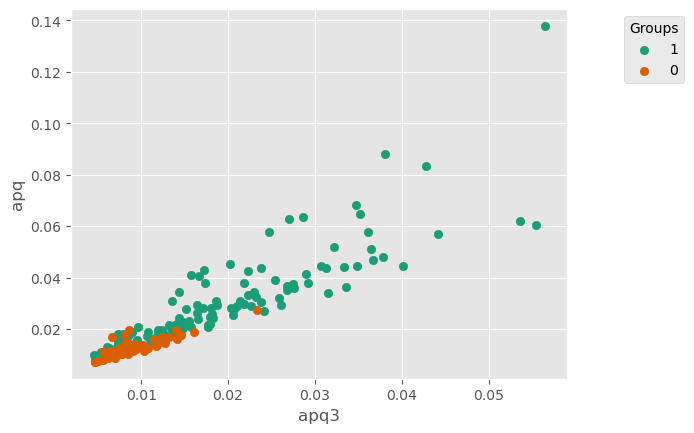

Scatter Plot of apq3 vs dda by status
Correlation: r=1.00


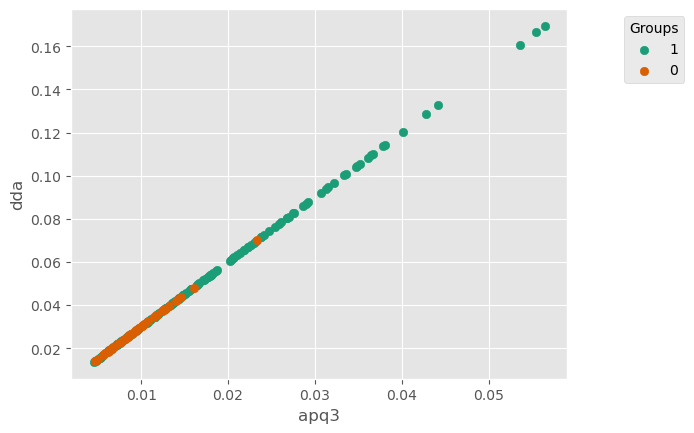

Scatter Plot of apq5 vs apq by status
Correlation: r=0.95


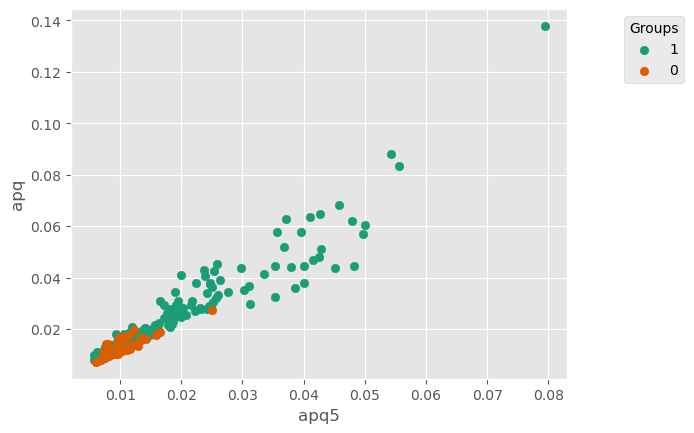

Scatter Plot of apq5 vs dda by status
Correlation: r=0.96


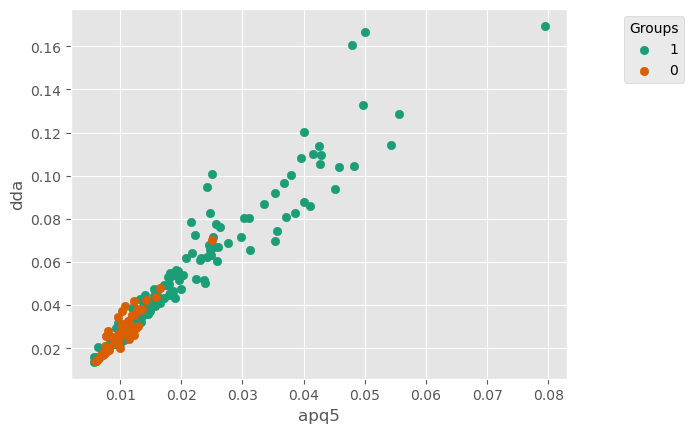

Scatter Plot of apq vs dda by status
Correlation: r=0.90


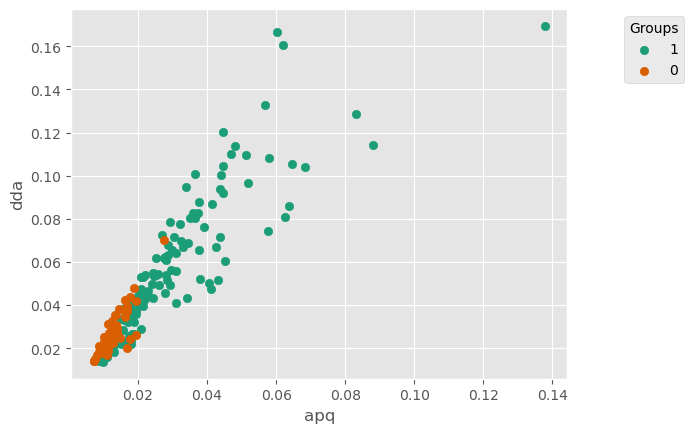

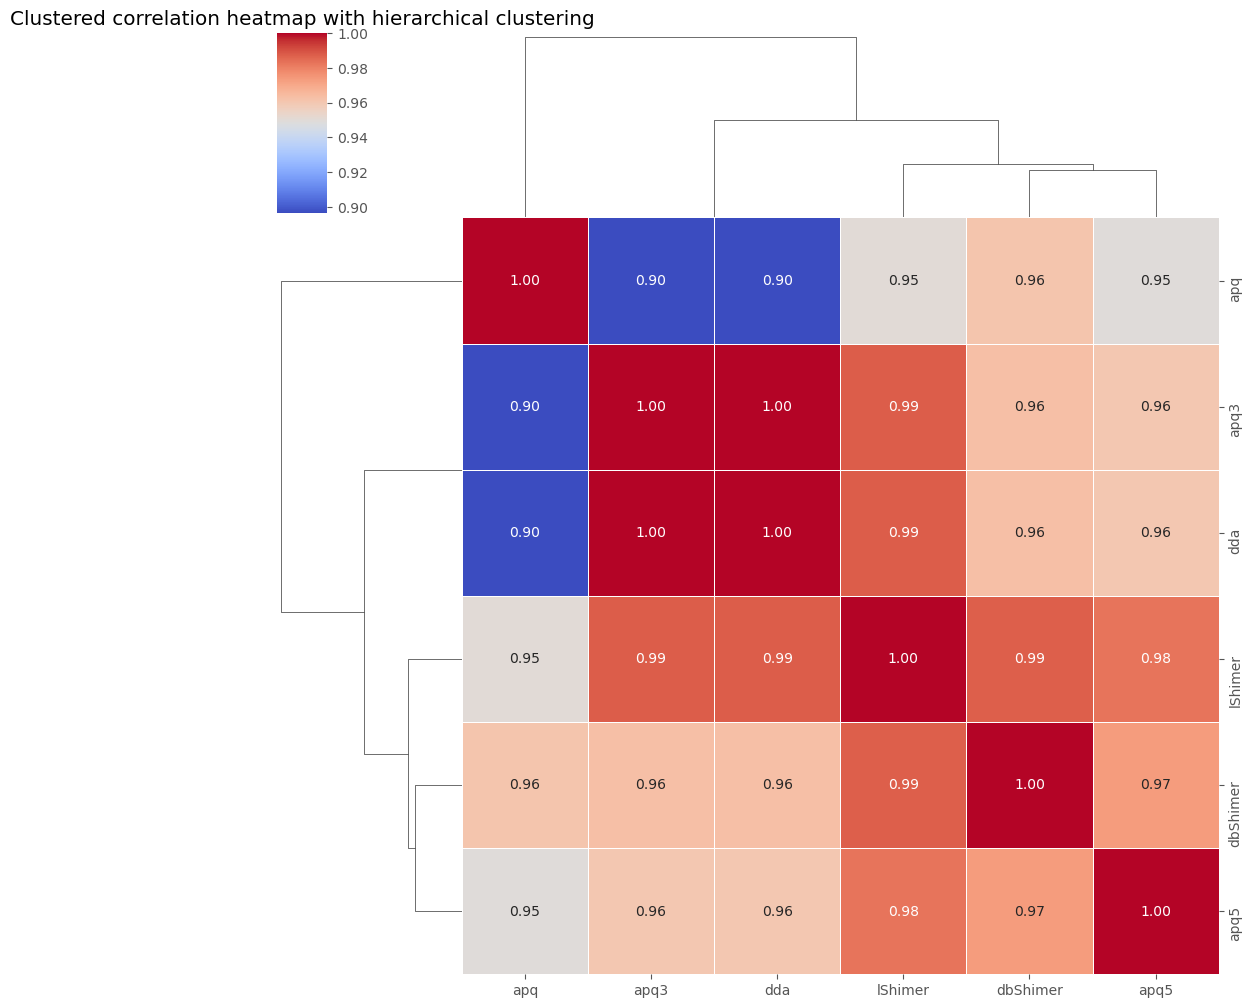

In [136]:
variable_correlation_plot(variable_list=vars_shimmer, df=dex, group='status')

### Intepretation of Correlation Plots & Feature selection

We inspected the pair-wise and variable wise correlation plots across those related to fundamental frequency, jitter, and shimmer. This showed the need to perform feature selection in some variable groups:

- For the variables relating to fundamental frequency, the pairwise correlations plots showed strong correlation between variables across some sample subsets, but this was not the case for all samples. For example while minFF and avFF had a moderately strong correlation of r=0.60, there were still many samples that did not fit this pattern. As a result, we decided we would keep each of these variables as they are for the analysis, at least for now.

- For the variables relating to jitter, the pairwise correlation plots and the correlation matrix confirmed that there was very strong correlation across all of the variables (r=>0.9). We therefore decided we would only keep 1 of these variables. Observing the correlation matrix we noted that while rap, ppq and ddp were all more correlated to eachother than to absjitter. In particular, absjitter and ppq had slightly lower pairwise correlation (r=0.9) than combinations of rap or ddp with absjitter. For this reason, rap was selected as the variable moving forward that was quite representative of all other jitter variables.

- Like jitter, all shimmer variables were highly correlated to eachother (r=>0.9). We decided therefore to only keep lShimer, as according to the clustered correlation heatmap and the hierarchical clustering, it appeared to be the variable that was the most representative on average of the overall shimmer variables.

In [121]:
# from the 3 variable lists discussed we want to keep all those from
# fundamental frequency, only rap for jitter, and only lShimer for shimmer
vars_to_be_dropped = [item for item in vars_jitter+vars_shimmer if not item in ['rap','lShimer']]
print(vars_to_be_dropped)

['absJitter', 'ppq', 'ddp', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda']


In [123]:
cleaned_df = dex.drop(columns=vars_to_be_dropped)
cleaned_df

,name,avFF,maxFF,minFF,percJitter,rap,lShimer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00370,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00465,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00544,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00502,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00655,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00263,0.04087,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00331,0.02751,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00624,0.02308,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00370,0.02296,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Let's have a quick sneak peak now at the overall correlations of the cleaned_df

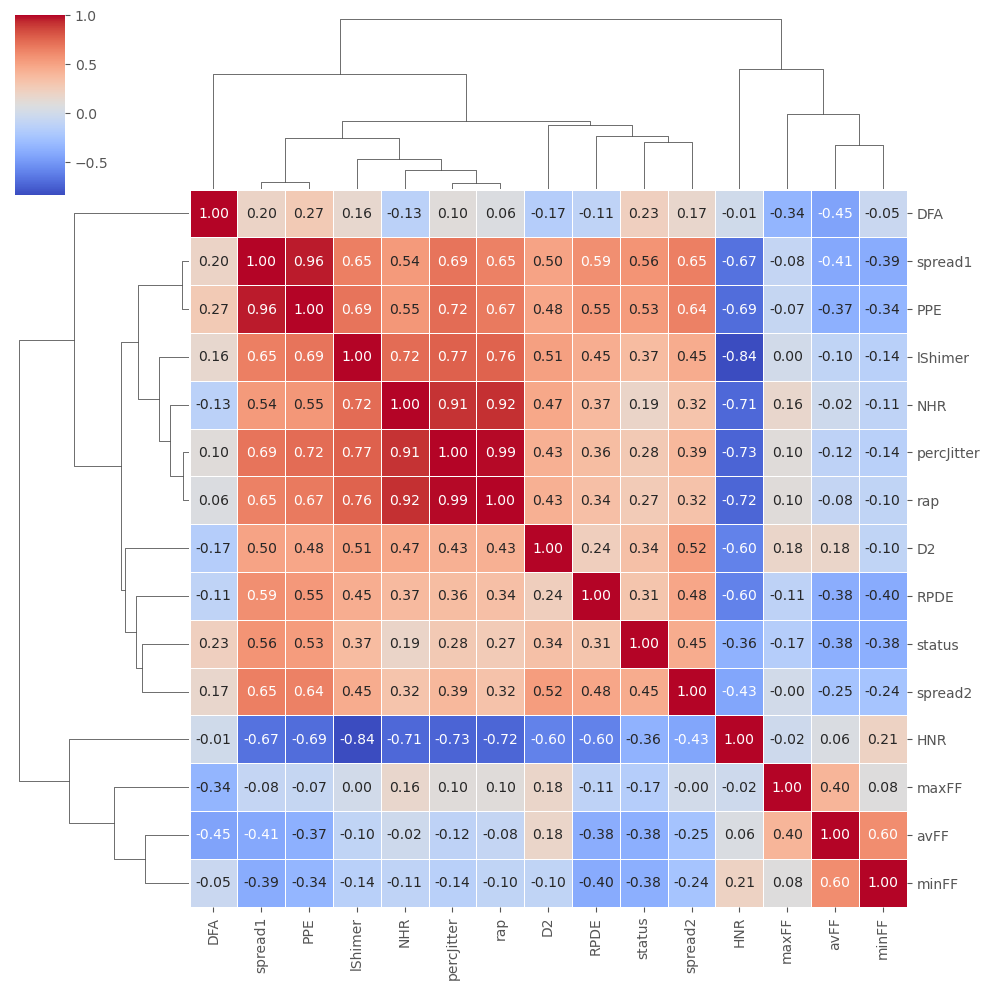

In [126]:
sns.clustermap(cleaned_df.drop(columns='name').corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

The above clustered heatmap reveals that a small number of variables are highly correlated despite being very similar. For example, there is a r=0.99 correlation between percjitter and rap. This indicates that perhaps percjitter should have been included in the filtering, despite not being explicityly included in the instructions. Nevertheless, we will proceed with the modelling and can perhaps drop one of these later if necessary.

# Task 2: Function group_and_average(df, gv)

# Task 3: Classifying patients and controls using kNN